## 1) import library

In [1]:
import requests
import gazpacho
import pandas as pd
import numpy as np

## 2) web scraping using gazpacho library

In [2]:
# HTTP request
url = "https://www.ohkajhuorganic.com/branch/"

html = requests.get(url,
                    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'})

# Create Soup Object
okj = gazpacho.Soup(html.text)

### 2.1 scraping branch name

In [3]:
branch_data = okj.find("h3", {"class": "fw-special-title"})

branches = [b.strip() for b in branch_data]

branches

['OHKAJHU ORGANIC BRANCH',
 'OHKAJHU AIRPORT BRANCH',
 'SIAM SQUARE ONE BRANCH',
 'RATCHAPRUK BRANCH',
 'DADFA LASALLE BRANCH',
 'SIAM SQUARE SOI 2 BRANCH',
 'THE PASEO PARK KANJANAPISEK BRANCH',
 'SB RAMA 2 BRANCH',
 'BTS SENANIKHOM BRANCH',
 'LADPRAO BRANCH',
 'PHETCHABURI - EKKAMAI BRANCH',
 'MARKET VILLAGE RANG-SIT BRANCH',
 'EKKAMAI - RAM INTHRA BRANCH',
 'SEACON SQUARE SRINAGARINDRA BRANCH',
 'INDEXLIVINGMALL BANGNA BRANCH',
 'ACTIVE PARK PTT STATION MUANGTHONG BRANCH',
 'SAI MAI MALL BRANCH',
 'MEGA BANGNA BRANCH',
 'FUTURE PARK RANGSIT BRANCH',
 'SEACON BANGKAE BRANCH',
 'Homepro Rama3 BRANCH',
 'PTT Station West Village Bangyai BRANCH',
 'INDEX PATTAYA BRANCH',
 'PASSIONE RAYONG BRANCH',
 'DESIGN VILLAGE KASET NAWAMIN BRANCH',
 'J PARK SRIRACHA BRANCH',
 'PTT STATION ANGSIRA BRANCH']

### 2.2 scraping phone number, location and email

In [4]:
data = okj.find("span", {"class": "list-title"})

information = [i.strip() for i in data]

information[:6]

['Call us at 061-274-9977',
 'Nongjom chiangmai,TH',
 'Email us at ohkajhu3@gmail.com',
 'Call us at 098-545-2492',
 'Nimcity chiangmai,TH',
 'Email us at ohkajhu1@hotmail.com']

## 3) create dataframe

In [5]:
# create dataframe
df = pd.DataFrame(data = {
    "branch" : branches
})

df["phone"] = information[::3]
df["location"] = information[1::3]
df["email"] = information[2::3]

## 4) view information of df

### 4.1 total rows and column

In [6]:
df.shape

(27, 4)

### 4.2 preview first 10 rows

In [7]:
df[:10]

,branch,phone,location,email
0,OHKAJHU ORGANIC BRANCH,Call us at 061-274-9977,"Nongjom chiangmai,TH",Email us at ohkajhu3@gmail.com
1,OHKAJHU AIRPORT BRANCH,Call us at 098-545-2492,"Nimcity chiangmai,TH",Email us at ohkajhu1@hotmail.com
2,SIAM SQUARE ONE BRANCH,Call us at 082-444-2251,"Siam Square One Bangkok,TH",Email us at ohkajhu1@hotmail.com
3,RATCHAPRUK BRANCH,Call us at 096-698-1666,"The Circle Ratchapruk Bangkok,TH",Email us at ohkajhu1@hotmail.com
4,DADFA LASALLE BRANCH,Call us at 097-126-4947,"Dadfa Lasalle Bangkok,TH",Email us at ohkajhu1@hotmail.com
5,SIAM SQUARE SOI 2 BRANCH,Call us at 062-309-4545,"Siam Square Soi 2 Bangkok,TH",Email us at ohkajhu1@hotmail.com
6,THE PASEO PARK KANJANAPISEK BRANCH,Call us at 097-921-9555,"The Paseo Park Kanjanapisek Bangkok,TH",Email us at ohkajhu1@hotmail.com
7,SB RAMA 2 BRANCH,Call us at 065-415-7999,"SB Rama 2 Bangkok,TH",Email us at ohkajhu1@hotmail.com
8,BTS SENANIKHOM BRANCH,Call us at 062-310-6989,"BTS Senanikom Bangkok,TH",Email us at ohkajhu1@hotmail.com
9,LADPRAO BRANCH,Call us at 082-339-4666,"Phetchaburi - Ekkamai Bangkok,TH",Email us at ohkajhu1@hotmail.com


### 4.3 information of data frame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   branch    27 non-null     object
 1   phone     27 non-null     object
 2   location  27 non-null     object
 3   email     27 non-null     object
dtypes: object(4)
memory usage: 996.0+ bytes


### 4.4 check missing value in each column 
- if sum() > 0 => have missing value

In [9]:
df.isna().sum()

branch      0
phone       0
location    0
email       0
dtype: int64

### 4.5 count unique value and show information

In [10]:
df.nunique()

branch      27
phone       27
location    26
email        2
dtype: int64

In [11]:
# find which location is duplicate
location_dup = df["location"].duplicated()

# show duplicate location
df[location_dup==True]

,branch,phone,location,email
15,ACTIVE PARK PTT STATION MUANGTHONG BRANCH,Call us at 066-121-0515,"Indexlivingmall bangna Bangkok,TH",Email us at ohkajhu1@hotmail.com


In [12]:
# find which email is duplicate
email_dup = df["email"].duplicated()

# show unique email
df[email_dup==False]

,branch,phone,location,email
0,OHKAJHU ORGANIC BRANCH,Call us at 061-274-9977,"Nongjom chiangmai,TH",Email us at ohkajhu3@gmail.com
1,OHKAJHU AIRPORT BRANCH,Call us at 098-545-2492,"Nimcity chiangmai,TH",Email us at ohkajhu1@hotmail.com


## 5) cleaning df

### 5.1 remove the 'email' column
- because it has only two unique values

In [13]:
# remove the 'email' column because it has only two unique values
df = df.drop(columns='email')

# show top 5 rows
df.head()

,branch,phone,location
0,OHKAJHU ORGANIC BRANCH,Call us at 061-274-9977,"Nongjom chiangmai,TH"
1,OHKAJHU AIRPORT BRANCH,Call us at 098-545-2492,"Nimcity chiangmai,TH"
2,SIAM SQUARE ONE BRANCH,Call us at 082-444-2251,"Siam Square One Bangkok,TH"
3,RATCHAPRUK BRANCH,Call us at 096-698-1666,"The Circle Ratchapruk Bangkok,TH"
4,DADFA LASALLE BRANCH,Call us at 097-126-4947,"Dadfa Lasalle Bangkok,TH"


### 5.2 eliminate redundant words and make it the same pattern
- BRANCH
- Call us at
- ,TH (because every branch is in Thailand)

In [14]:
# replace redundant words
df['branch'] = df['branch'].str.replace(' BRANCH', '').str.title()
df['phone'] = df['phone'].str.replace('Call us at ', '')
df['location'] = df['location'].str.replace(',TH', '').str.title()

# show top 5 rows
df[:5]

,branch,phone,location
0,Ohkajhu Organic,061-274-9977,Nongjom Chiangmai
1,Ohkajhu Airport,098-545-2492,Nimcity Chiangmai
2,Siam Square One,082-444-2251,Siam Square One Bangkok
3,Ratchapruk,096-698-1666,The Circle Ratchapruk Bangkok
4,Dadfa Lasalle,097-126-4947,Dadfa Lasalle Bangkok


### 5.3 split province column

In [15]:
df['province'] = df['location'].str.split(" ").str[-1]

df.head()

,branch,phone,location,province
0,Ohkajhu Organic,061-274-9977,Nongjom Chiangmai,Chiangmai
1,Ohkajhu Airport,098-545-2492,Nimcity Chiangmai,Chiangmai
2,Siam Square One,082-444-2251,Siam Square One Bangkok,Bangkok
3,Ratchapruk,096-698-1666,The Circle Ratchapruk Bangkok,Bangkok
4,Dadfa Lasalle,097-126-4947,Dadfa Lasalle Bangkok,Bangkok


In [16]:
# find duplicate province
province_dup = df["province"].duplicated()

# show unique province
province_data = df[province_dup==False]

province_data = province_data['province']

print(province_data)

0     Chiangmai
2       Bangkok
22     Chonburi
Name: province, dtype: object


### 5.4 remove province from location column

In [17]:
# replace redundant words
df['location'] = df['location'].str.replace(r'( Chiangmai| Bangkok| Chonburi)', '', regex=True)

# show top 5 rows
df[:5]

,branch,phone,location,province
0,Ohkajhu Organic,061-274-9977,Nongjom,Chiangmai
1,Ohkajhu Airport,098-545-2492,Nimcity,Chiangmai
2,Siam Square One,082-444-2251,Siam Square One,Bangkok
3,Ratchapruk,096-698-1666,The Circle Ratchapruk,Bangkok
4,Dadfa Lasalle,097-126-4947,Dadfa Lasalle,Bangkok


### 5.5 wrong input in location from website

**Date** : 2024-01-20

**Website** : https://www.ohkajhuorganic.com/branch/

- have to replace "Active Park Ptt Station Muangthong" location to correct value ""

**Image Detail** : 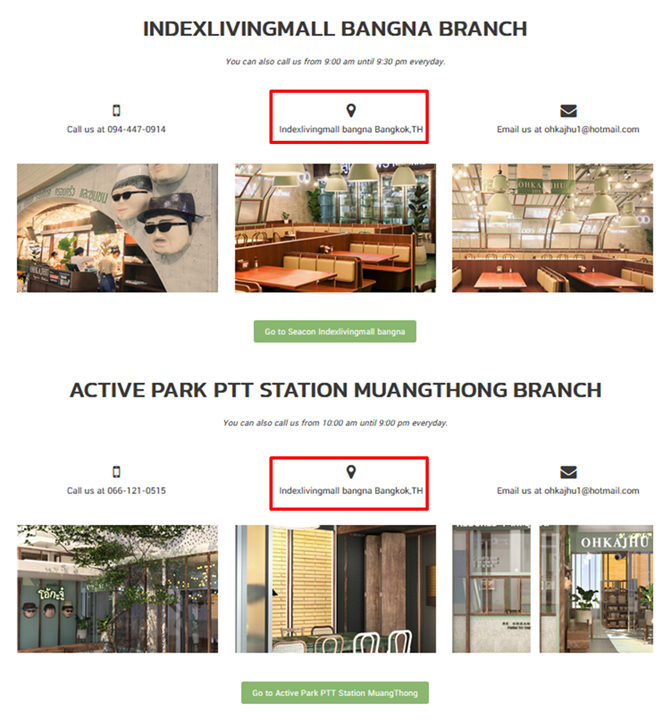

In [18]:
# show rows that value = 'Indexlivingmall Bangna''
df[df["location"]=='Indexlivingmall Bangna']

,branch,phone,location,province
14,Indexlivingmall Bangna,094-447-0914,Indexlivingmall Bangna,Bangkok
15,Active Park Ptt Station Muangthong,066-121-0515,Indexlivingmall Bangna,Bangkok


In [19]:
df["location"][15] = 'PTT Station Active Park'

In [20]:
df

,branch,phone,location,province
0,Ohkajhu Organic,061-274-9977,Nongjom,Chiangmai
1,Ohkajhu Airport,098-545-2492,Nimcity,Chiangmai
2,Siam Square One,082-444-2251,Siam Square One,Bangkok
3,Ratchapruk,096-698-1666,The Circle Ratchapruk,Bangkok
4,Dadfa Lasalle,097-126-4947,Dadfa Lasalle,Bangkok
5,Siam Square Soi 2,062-309-4545,Siam Square Soi 2,Bangkok
6,The Paseo Park Kanjanapisek,097-921-9555,The Paseo Park Kanjanapisek,Bangkok
7,Sb Rama 2,065-415-7999,Sb Rama 2,Bangkok
8,Bts Senanikhom,062-310-6989,Bts Senanikom,Bangkok
9,Ladprao,082-339-4666,Phetchaburi - Ekkamai,Bangkok


### 6. export CSV file

In [28]:
# save DataFrame to a CSV file
df.to_csv("branch.csv", index=False)  # Use 'to_csv' and add parentheses

print("Data successfully saved to 'branch.csv'")

Data successfully saved to 'branch.csv'
